# BAX Emittance Minimization (LCLS-II) - Includes Bmag calculation
In this notebook, we hope to demonstrate Bayesian Algorithm Execution (BAX) in Xopt as a means of minimizing the emittance at LCLS-II. BAX is a generalization of Bayesian Optimization that seeks to acquire observations that provide our model with maximal information about our property of interest. In this example, our property of interest is the minimal emittance and its location in tuning-parameter-space. See https://arxiv.org/pdf/2209.04587.pdf for details.

In [1]:
# set up env for running on SLAC production servers
import os
os.environ['OMP_NUM_THREADS']=str(6)

In [2]:
run_dir = '/home/physics/ml_tuning/20240416_LCLS_II_Injector'

# Read pv info from YAML files

In [10]:
import sys
import yaml
# sys.path.append("../../")
sys.path.append("../")

from common import get_pv_objects, save_reference_point, set_magnet_strengths, \
    measure_pvs

In [4]:
pv_bounds = yaml.safe_load(open("pv_bounds.yml"))
pv_objects = get_pv_objects("tracked_pvs.yml")

In [5]:
pv_bounds

{'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
 'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
 'QUAD:HTR:120:BCTRL': [-4.48, 1],
 'QUAD:HTR:140:BCTRL': [-4.4778, 4.4762],
 'QUAD:HTR:300:BCTRL': [-4.46035, 4.4692],
 'QUAD:HTR:320:BCTRL': [-4.46919, 4.4792],
 'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
 'SOLN:GUNB:823:BCTRL': [0.021, 0.0255]}

# load reference point
Also define a function to write the reference values to the pvs

In [6]:
reference = yaml.safe_load(open("reference.yml"))

def reset_pvs():
    set_magnet_strengths(reference, pv_objects, validate=False)

In [7]:
reference

{'QUAD:COL0:320:BCTRL': -0.10923,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'QUAD:HTR:120:BCTRL': -2.1773542,
 'QUAD:HTR:140:BCTRL': 1.7649175,
 'QUAD:HTR:300:BCTRL': 1.8073254,
 'QUAD:HTR:320:BCTRL': -2.340077,
 'SOLN:GUNB:212:BCTRL': 0.04418,
 'SOLN:GUNB:823:BCTRL': 0.0247}

In [8]:
reset_pvs()

QUAD:COL0:320:BCTRL -0.10923
QUAD:GUNB:212:1:BCTRL 0.002411
QUAD:GUNB:212:2:BCTRL 0.002356
QUAD:GUNB:823:1:BCTRL 0.0032658
QUAD:GUNB:823:2:BCTRL 0.002111
QUAD:HTR:120:BCTRL -2.1773542
QUAD:HTR:140:BCTRL 1.7649175
QUAD:HTR:300:BCTRL 1.8073254
QUAD:HTR:320:BCTRL -2.340077
SOLN:GUNB:212:BCTRL 0.04418
SOLN:GUNB:823:BCTRL 0.0247


In [12]:
from scripts.image import ImageDiagnostic, ROI
import yaml

fname = 'OTR0H04_diagnostic.yml' #run_dir + "OTRS_HTR_330_config.yml"

roi = ROI(
    ycenter=967,
    xcenter=878,
    xwidth=600,
    ywidth=600
)
    

image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.roi = roi
image_diagnostic.min_log_intensity = 5.0
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 2
image_diagnostic.visualize = False
print(image_diagnostic.yaml())


screen_name: OTRS:HTR:330
array_data_suffix: Image:ArrayData
array_n_cols_suffix: Image:ArraySize0_RBV
array_n_rows_suffix: Image:ArraySize1_RBV
resolution_suffix: RESOLUTION
resolution: 19.24
beam_shutter_pv: TPR:LGUN:TS01:0:TRG00_SYS2_TCTL
extra_pvs: []
background_file: null
save_image_location: /home/physics/ml_tuning/20240416_LCLS_II_Injector
roi: {xcenter: 878, ycenter: 967, xwidth: 600, ywidth: 600}
min_log_intensity: 5.0
bounding_box_half_width: 3.0
wait_time: 1.0
n_fitting_restarts: 2
visualize: false
return_statistics: false
threshold: 0.0
apply_bounding_box_constraint: true
testing: false



In [16]:
image_diagnostic.measure_background()

array([[0. , 0.2, 0. , ..., 0. , 0. , 0.6],
       [0. , 0. , 0. , ..., 0. , 0. , 0.8],
       [0. , 0. , 0. , ..., 0. , 0.6, 3.6],
       ...,
       [0. , 0. , 0. , ..., 0.2, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.2, 0. ]])

displaying image
fitting image
{'Cx': 315.95348198141164,
 'Cy': 304.0853004905635,
 'Sx': 10.7147338982239,
 'Sy': 25.064122214295647,
 'bb_penalty': -207.27278888521047,
 'log10_total_intensity': 5.6851793886634265,
 'total_intensity': 484372.4000000001}


{'Cx': 315.95348198141164,
 'Cy': 304.0853004905635,
 'Sx': 206.1514802018278,
 'Sy': 482.23371140304823,
 'bb_penalty': -207.27278888521047,
 'total_intensity': 484372.4000000001,
 'log10_total_intensity': 5.6851793886634265}

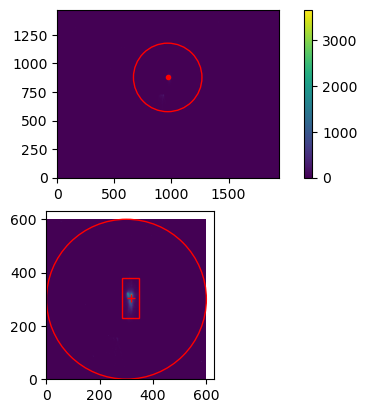

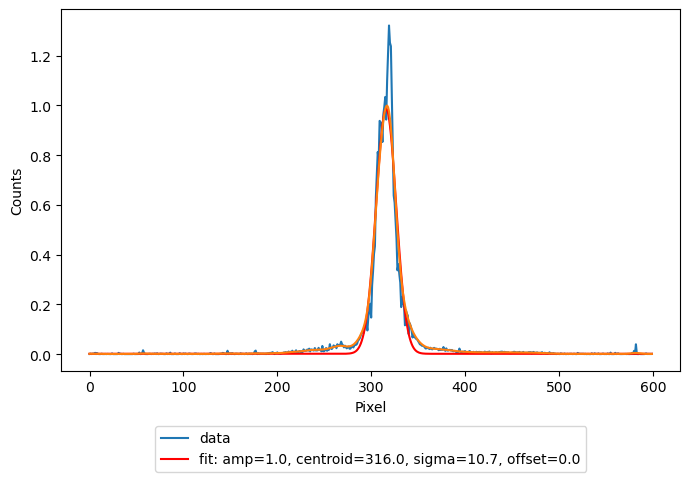

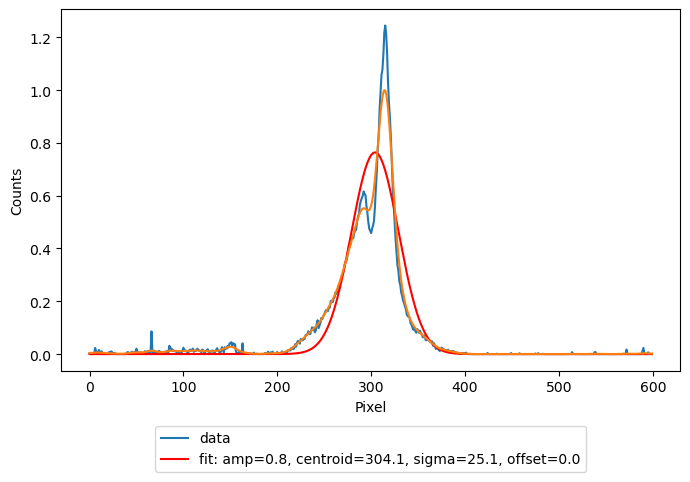

In [17]:
image_diagnostic.test_measurement()

# Imports

In [14]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")
import torch
from xopt import Xopt
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
import numpy as np
import random

# Evaluator

In [15]:
import time
# define function to measure the total size on OTR4
def eval_beamsize(inputs):
    
    # set pvs and wait for BACT to settle to correct values (validate=True)
    set_magnet_strengths(inputs, pv_objects, validate=True)
    time.sleep(0.5)
    # measure all pvs - except for names in inputs
    results = measure_pvs(
        [name for name in pv_objects.keys() if name not in inputs], pv_objects 
    )

    # do some calculations
    results["time"] = time.time()

    # add beam size measurement to results dict
    beamsize_results = image_diagnostic.measure_beamsize(1)
    results["Sx_mm"] = np.array(beamsize_results["Sx"]) * 1e-3
    results["Sy_mm"] = np.array(beamsize_results["Sy"]) * 1e-3

    #add beam size squared (mm^2)
    results["xrms_sq"] = results["Sx_mm"]**2
    results["yrms_sq"] = results["Sy_mm"]**2
    results = beamsize_results | results
    return results

evaluator = Evaluator(function=eval_beamsize)


In [16]:
eval_beamsize({})

fitting image


{'Cx': 292.0923892345652,
 'Cy': 280.9178595215745,
 'Sx': 216.94025489437718,
 'Sy': 197.02225893463225,
 'bb_penalty': -235.0226439179532,
 'total_intensity': 455593.6,
 'log10_total_intensity': 5.658577614651561,
 'save_filename': '/home/physics/ml_tuning/20240324_LCLS_II_Injector/OTRS_HTR_330_1711348859.h5',
 'QUAD:HTR:140:BCTRL': 1.7526053,
 'QUAD:HTR:300:BCTRL': -1.2604819,
 'QUAD:HTR:320:BCTRL': 1.04152,
 'SOLN:GUNB:212:BCTRL': 0.0441892,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'SOLN:GUNB:823:BCTRL': 0.025,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'ACCL:GUNB:455:PDES': -121.7,
 'ACCL:L0B:0110:ADES': 6.5,
 'ACCL:L0B:0110:PDES': 0.0,
 'ACCL:L0B:0130:PDES': 0.0,
 'QUAD:HTR:120:BCTRL': -1.8589368,
 'QUAD:COL0:320:BCTRL': 0.87065,
 'time': 1711348859.7381244,
 'Sx_mm': 0.21694025489437718,
 'Sy_mm': 0.19702225893463224,
 'xrms_sq': 0.047063074193637346,
 'yrms_sq': 0.03881777051570527}

## VOCS

In [17]:
# create Xopt objects
from xopt import VOCS

IMAGE_CONSTRAINTS = {
            "bb_penalty": ["LESS_THAN", 0.0],
        }

vocs = VOCS(
    variables = {
        'SOLN:GUNB:823:BCTRL': [0.0225, 0.0285],
        'QUAD:HTR:120:BCTRL': [-3.0, -0.5],
        'QUAD:GUNB:823:2:BCTRL': [-0.005, 0.005],
        'QUAD:GUNB:823:1:BCTRL': [-0.005, 0.005],
        #'SOLN:GUNB:212:BCTRL': [0.044, 0.044574],
        #'QUAD:GUNB:212:2:BCTRL': [-0.005, 0.005],
        #'QUAD:GUNB:212:1:BCTRL': [-0.005, 0.005],
    },
    constraints = IMAGE_CONSTRAINTS,
    observables = ["xrms_sq", "yrms_sq"],
)
vocs.variable_names

['QUAD:GUNB:823:1:BCTRL',
 'QUAD:GUNB:823:2:BCTRL',
 'QUAD:HTR:120:BCTRL',
 'SOLN:GUNB:823:BCTRL']

# Run Bayesian Exploration on a grid

In [18]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.bayesian_exploration import BayesianExplorationGenerator
from xopt.numerical_optimizer import GridOptimizer
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
sys.path.append("../../emitopt/")

meas_dim = 2
tuning_dims = [0,1,3]

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {
    'xrms_sq': scaled_covar_module,
    "yrms_sq": deepcopy(scaled_covar_module)
}
# covar_module_dict = {}
model_constructor = StandardModelConstructor(
    covar_modules=covar_module_dict, use_low_noise_prior=True
)

generator = BayesianExplorationGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    numerical_optimizer=GridOptimizer(n_grid_points=5),
    n_interpolate_points=5
)

from xopt import Xopt
X_bayes_exp = Xopt(
    vocs=vocs,
    generator=generator,
    evaluator=evaluator,
    strict=True
)

## sample in local area around reference point

In [19]:
from epics import caget_many
from xopt.utils import get_local_region

reset_pvs()
current_value = dict(
    zip(
        X_bayes_exp.vocs.variable_names,
        caget_many(X_bayes_exp.vocs.variable_names)
    )
)
print(current_value)


random_sample_region = get_local_region(current_value,X_bayes_exp.vocs, fraction=0.25)
X_bayes_exp.random_evaluate(10, custom_bounds=random_sample_region)

QUAD:COL0:320:BCTRL 0.87065
QUAD:GUNB:212:1:BCTRL 0.002411
QUAD:GUNB:212:2:BCTRL 0.002356
QUAD:GUNB:823:1:BCTRL 0.0032658
QUAD:GUNB:823:2:BCTRL 0.002111
QUAD:HTR:120:BCTRL -1.8589368
QUAD:HTR:140:BCTRL 1.7526053
QUAD:HTR:300:BCTRL -1.2604819
QUAD:HTR:320:BCTRL 1.04152
SOLN:GUNB:212:BCTRL 0.0441892
SOLN:GUNB:823:BCTRL 0.025
{'QUAD:GUNB:823:1:BCTRL': 0.0032658, 'QUAD:GUNB:823:2:BCTRL': 0.002111, 'QUAD:HTR:120:BCTRL': -1.8589368, 'SOLN:GUNB:823:BCTRL': 0.025}
QUAD:GUNB:823:1:BCTRL 0.00444223334973706
QUAD:GUNB:823:2:BCTRL 0.0032498506265918534
QUAD:HTR:120:BCTRL -1.2657911978987606
SOLN:GUNB:823:BCTRL 0.023547493664337508
fitting image
QUAD:GUNB:823:1:BCTRL 0.004728467086331526
QUAD:GUNB:823:2:BCTRL 0.004480872755088472
QUAD:HTR:120:BCTRL -1.370786632191531
SOLN:GUNB:823:BCTRL 0.024111490279431845
fitting image
QUAD:GUNB:823:1:BCTRL 0.002433165597528682
QUAD:GUNB:823:2:BCTRL -0.0002887589549736703
QUAD:HTR:120:BCTRL -2.1606798123853235
SOLN:GUNB:823:BCTRL 0.02488399218036568
fitting image

,QUAD:GUNB:823:1:BCTRL,QUAD:GUNB:823:2:BCTRL,QUAD:HTR:120:BCTRL,SOLN:GUNB:823:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,QUAD:COL0:320:BCTRL,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,0.004442,0.003250,-1.265791,0.023547,295.912755,259.382595,169.822874,1290.631705,-56.216729,449888.2,...,0.0,0.0,0.87065,1.711349e+09,0.169823,1.290632,0.028840,1.665730,5.540013,False
1,0.004728,0.004481,-1.370787,0.024111,296.746844,266.642856,155.664052,832.909117,-134.466873,450822.8,...,0.0,0.0,0.87065,1.711349e+09,0.155664,0.832909,0.024231,0.693738,3.024858,False
2,0.002433,-0.000289,-2.160680,0.024884,295.048519,289.198192,381.206114,255.587315,-218.072762,491217.2,...,0.0,0.0,0.87065,1.711349e+09,0.381206,0.255587,0.145318,0.065325,4.048367,False
3,0.001360,0.000083,-2.454495,0.024011,293.820080,296.544915,638.382478,518.754035,-164.758617,450689.0,...,0.0,0.0,0.87065,1.711349e+09,0.638382,0.518754,0.407532,0.269106,3.042518,False
4,0.001823,0.002234,-2.058304,0.024848,293.734020,286.405952,314.740040,204.018478,-228.415109,456197.4,...,0.0,0.0,0.87065,1.711349e+09,0.314740,0.204018,0.099061,0.041624,2.930290,False
5,0.001459,0.004099,-1.389282,0.024490,295.028057,272.126150,165.353495,755.448919,-151.121437,474869.2,...,0.0,0.0,0.87065,1.711349e+09,0.165353,0.755449,0.027342,0.570703,3.057810,False
6,0.002296,0.001926,-1.800429,0.024260,292.666460,280.152591,251.888137,203.077599,-230.531017,463646.4,...,0.0,0.0,0.87065,1.711349e+09,0.251888,0.203078,0.063448,0.041241,3.081973,False
7,0.003637,0.004252,-1.355890,0.024169,295.320124,271.426502,154.383245,819.485994,-141.026338,453074.4,...,0.0,0.0,0.87065,1.711349e+09,0.154383,0.819486,0.023834,0.671557,3.831298,False
8,0.004298,0.004144,-2.343494,0.026030,285.892434,289.871162,205.182899,225.982878,-235.321683,462686.8,...,0.0,0.0,0.87065,1.711349e+09,0.205183,0.225983,0.042100,0.051068,4.114523,False
9,0.001934,-0.000009,-2.338307,0.024144,295.483527,294.937774,503.574350,432.406660,-189.776773,466617.0,...,0.0,0.0,0.87065,1.711349e+09,0.503574,0.432407,0.253587,0.186976,4.006128,False


In [20]:
import time
start = time.time()
for i in range(5):
    X_bayes_exp.step()
print(time.time() - start)

QUAD:GUNB:823:1:BCTRL 0.0025455864811213987
QUAD:GUNB:823:2:BCTRL -0.0005063707682218734
QUAD:HTR:120:BCTRL -2.2206458227862873
SOLN:GUNB:823:BCTRL 0.025013479041454772
fitting image
QUAD:GUNB:823:1:BCTRL 0.0031566898138651383
QUAD:GUNB:823:2:BCTRL -0.0010035280526784498
QUAD:HTR:120:BCTRL -2.1029843670897153
SOLN:GUNB:823:BCTRL 0.025882609149364813
fitting image
QUAD:GUNB:823:1:BCTRL 0.0037677931466088784
QUAD:GUNB:823:2:BCTRL -0.0015006853371350261
QUAD:HTR:120:BCTRL -1.9853229113931434
SOLN:GUNB:823:BCTRL 0.026751739257274858
fitting image
QUAD:GUNB:823:1:BCTRL 0.004378896479352618
QUAD:GUNB:823:2:BCTRL -0.0019978426215916025
QUAD:HTR:120:BCTRL -1.8676614556965718
SOLN:GUNB:823:BCTRL 0.0276208693651849
fitting image
QUAD:GUNB:823:1:BCTRL 0.004989999812096357
QUAD:GUNB:823:2:BCTRL -0.0024949999060481787
QUAD:HTR:120:BCTRL -1.75
SOLN:GUNB:823:BCTRL 0.02848999947309494
fitting image
QUAD:GUNB:823:1:BCTRL 0.0029939998872578143
QUAD:GUNB:823:2:BCTRL -0.0029939998872578143
QUAD:HTR:120:BC

In [21]:
X_bayes_exp.dump_file = "bayes_exp.yml"
X_bayes_exp.dump()

## Visualize model/data

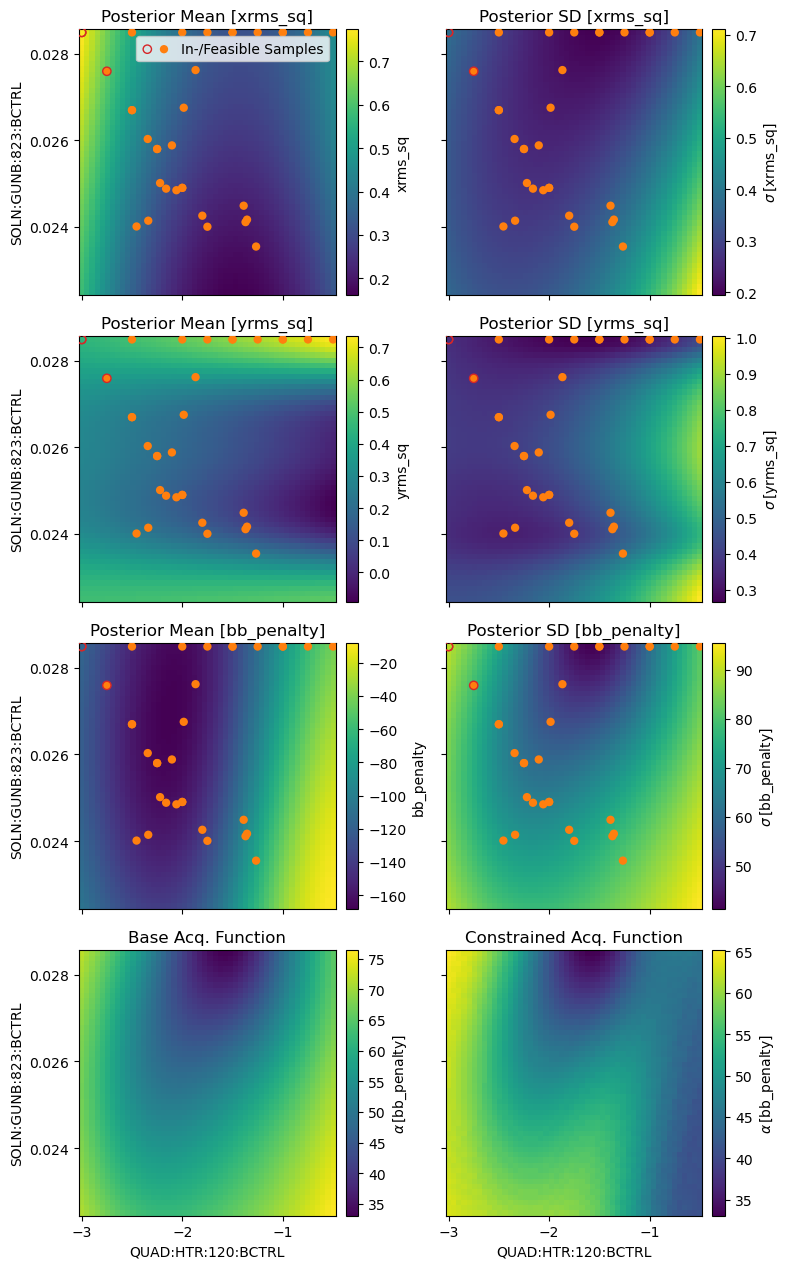

In [22]:
from xopt.generators.bayesian.visualize import visualize_generator_model
fig,ax = visualize_generator_model(
    X_bayes_exp.generator,
    variable_names=['QUAD:HTR:120:BCTRL','SOLN:GUNB:823:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
)

#fig,ax = visualize_generator_model(
#    X_bayes_exp.generator,
#    variable_names=['QUAD:HTR:120:BCTRL','QUAD:GUNB:823:1:BCTRL'],
#    output_names=["xrms_sq","yrms_sq","bb_penalty"],
#)

#fig,ax = visualize_generator_model(
#    X_bayes_exp.generator,
#    variable_names=['QUAD:HTR:120:BCTRL','QUAD:GUNB:823:2:BCTRL'],
#    output_names=["xrms_sq","yrms_sq","bb_penalty"],
#)


# Run BAX

In [23]:
from gpytorch.kernels import MaternKernel, PolynomialKernel, ScaleKernel
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from copy import deepcopy
import torch
from test_algorithm import GridMinimizeEmitBmag

covar_module = (MaternKernel(ard_num_dims=len(tuning_dims),
                              active_dims=tuning_dims,
                              lengthscale_prior=None) *
                              PolynomialKernel(power=2, active_dims=[meas_dim])
                 )
scaled_covar_module = ScaleKernel(covar_module)

# prepare options for Xopt generator
covar_module_dict = {'xrms_sq': scaled_covar_module, "yrms_sq": deepcopy(scaled_covar_module)}
model_constructor = StandardModelConstructor(
    covar_modules=covar_module_dict, use_low_noise_prior=True
)

QUAD_LENGTH = 0.124 # m
rmat_x = torch.tensor([[-2.3353,    4.9351],
   [-0.4769,   0.5796 ]])
rmat_y = torch.tensor([[3.1537,   5.5806],
[ 0.1835,    0.6419]])
THICK_QUAD = False
BEAM_ENERGY = 0.088 # GeV
SCALE_FACTOR = 2.74 # multiplicative factor to convert from measurement quad PV units to geometric focusing strength

algo_kwargs = {
        'x_key': "xrms_sq",
        'y_key': "yrms_sq",
        'scale_factor': SCALE_FACTOR,
        'q_len': QUAD_LENGTH,
        'rmat_x': rmat_x,
        'rmat_y': rmat_y,
        'n_samples': 20,
        'meas_dim': meas_dim,
        'n_steps_measurement_param': 11,
        'thick_quad': THICK_QUAD,
        'init': 'smallest',
        'scipy_options': {'maxiter':25},
        'jitter': 0.1,
        'twiss0_x':torch.tensor([5.012, 0.0487]),
        'twiss0_y':torch.tensor([5.012, 0.0487])
}
algo = GridMinimizeEmitBmag(**algo_kwargs)

# Initialize Xopt Optimizer

In [24]:
from xopt.generators.bayesian.bax_generator import BaxGenerator



#construct BAX generator
generator = BaxGenerator(
    vocs=vocs,
    gp_constructor=model_constructor,
    algorithm=algo,
    #numerical_optimizer=GridOptimizer(n_grid_points=10),
    n_interpolate_points=5
)
generator.numerical_optimizer.max_time = 10.0
generator.numerical_optimizer.n_restarts = 128

#construct Xopt optimizer and add data
X_bax = Xopt(
    evaluator=evaluator,
    generator=generator,
    vocs=vocs,
    dump_file="run_results_2024_03_24/BAX_run_be_5.yml"
)
X_bax.add_data(X_bayes_exp.data)

In [25]:
import time
start = time.time()
for i in range(10):
    print(i)
    X_bax.step()
print(time.time() - start)

0
QUAD:GUNB:823:1:BCTRL 0.004542238912308597
QUAD:GUNB:823:2:BCTRL -0.003845905926525943
QUAD:HTR:120:BCTRL -2.968939166256433
SOLN:GUNB:823:BCTRL 0.027689115036474542
fitting image
QUAD:GUNB:823:1:BCTRL 0.004094478012520837
QUAD:GUNB:823:2:BCTRL -0.002701812040955529
QUAD:HTR:120:BCTRL -2.9378883460931875
SOLN:GUNB:823:BCTRL 0.026888230599854145
fitting image
QUAD:GUNB:823:1:BCTRL 0.003646717112733078
QUAD:GUNB:823:2:BCTRL -0.001557718155385114
QUAD:HTR:120:BCTRL -2.9068375259299426
SOLN:GUNB:823:BCTRL 0.026087346163233743
fitting image
QUAD:GUNB:823:1:BCTRL 0.003198956212945318
QUAD:GUNB:823:2:BCTRL -0.00041362426981470055
QUAD:HTR:120:BCTRL -2.8757867057666973
SOLN:GUNB:823:BCTRL 0.025286461726613346
fitting image
QUAD:GUNB:823:1:BCTRL 0.002751195313157558
QUAD:GUNB:823:2:BCTRL 0.0007304696157557138
QUAD:HTR:120:BCTRL -2.8447358856034524
SOLN:GUNB:823:BCTRL 0.024485577289992948
fitting image
1
QUAD:GUNB:823:1:BCTRL 0.002755186345791621
QUAD:GUNB:823:2:BCTRL 0.0013606509636063164
QUA

In [26]:
X_bax.dump()

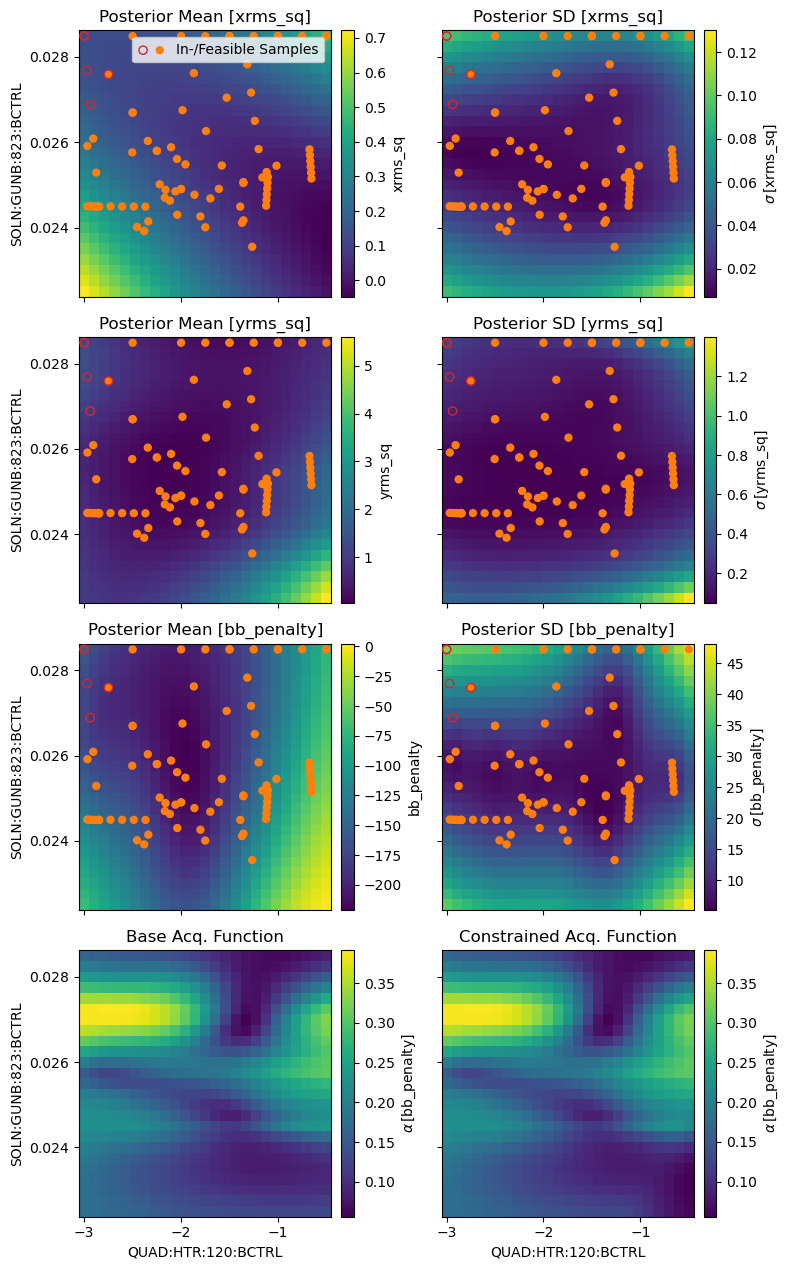

In [27]:
X_bax.generator.train_model()
fig,ax = visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL','SOLN:GUNB:823:BCTRL'],
    output_names=["xrms_sq","yrms_sq","bb_penalty"],
    n_grid=25
)


## view data and model

{'QUAD:GUNB:823:1:BCTRL': tensor(0.0025, dtype=torch.float64), 'QUAD:GUNB:823:2:BCTRL': tensor(0.0037, dtype=torch.float64), 'SOLN:GUNB:823:BCTRL': tensor(0.0258, dtype=torch.float64)}


(<Figure size 900x600 with 6 Axes>,
 array([[<Axes: xlabel='QUAD:GUNB:823:1:BCTRL', ylabel='Emittance'>,
         <Axes: xlabel='QUAD:GUNB:823:2:BCTRL'>,
         <Axes: xlabel='SOLN:GUNB:823:BCTRL'>],
        [<Axes: xlabel='QUAD:GUNB:823:1:BCTRL', ylabel='Sample Validity Rate'>,
         <Axes: xlabel='QUAD:GUNB:823:2:BCTRL'>,
         <Axes: xlabel='SOLN:GUNB:823:BCTRL'>]], dtype=object))

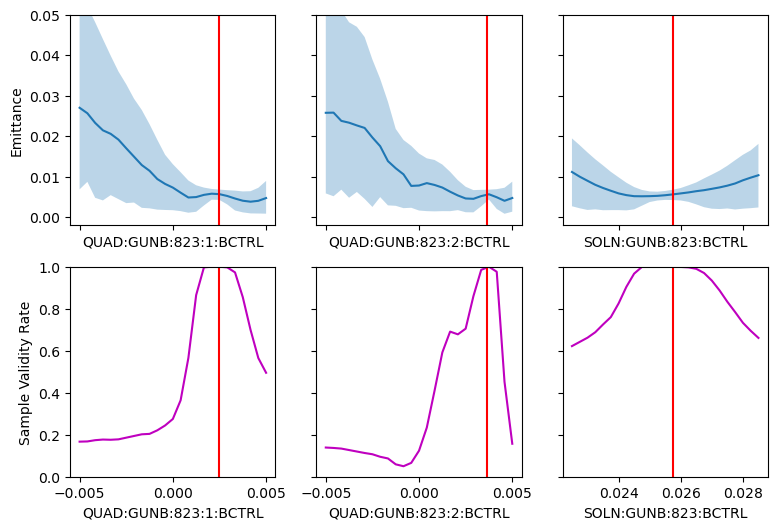

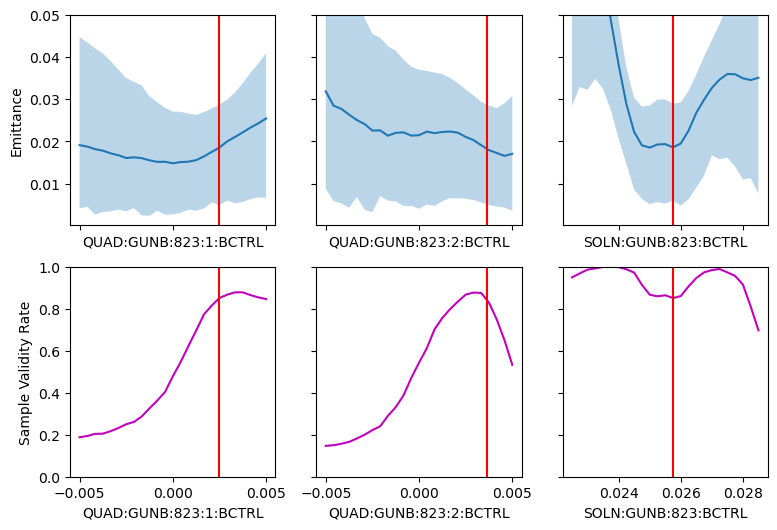

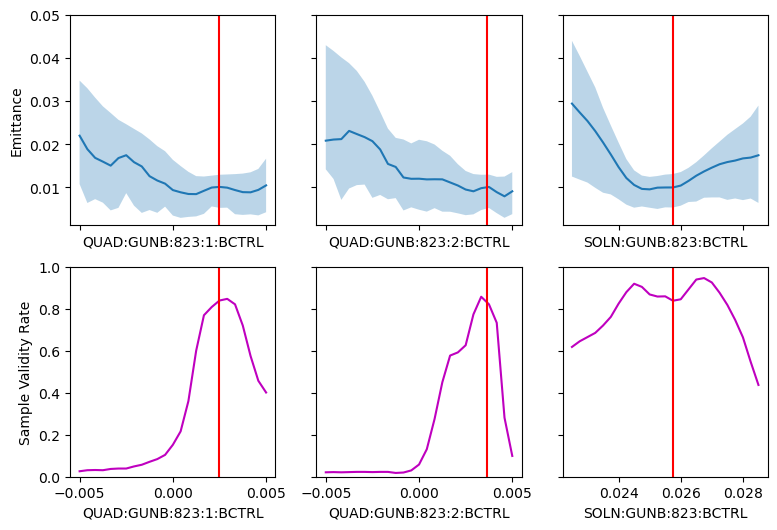

In [29]:
from test_algorithm import plot_virtual_emittance
from emitopt.utils import get_bax_optimum
best_x = get_bax_optimum(X_bax.generator)
print(best_x)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, dim="x", y_max=0.05
)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, dim="y", y_max=0.05
)
plot_virtual_emittance(
    X_bax, best_x, 
    n_points=25, y_max=0.05
)

torch.Size([1000, 25])
torch.Size([1000, 25, 1])
torch.Size([1000, 25])
torch.Size([1000, 25, 1])
torch.Size([1000, 25])
torch.Size([1000, 25, 1])


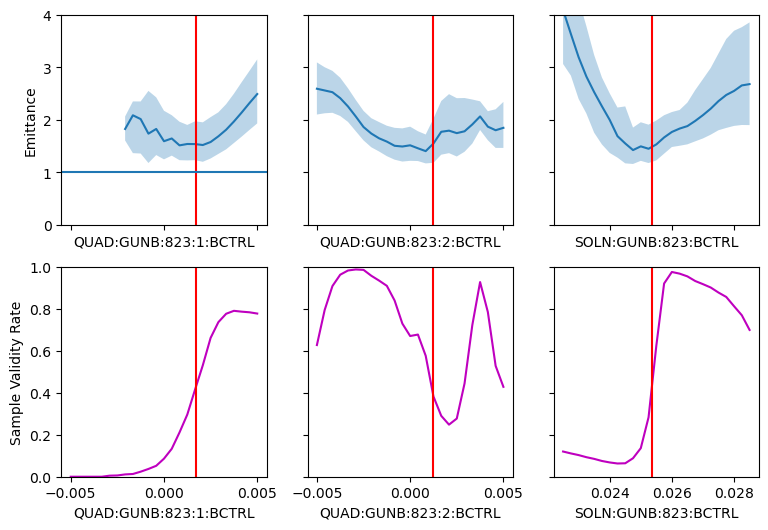

In [52]:
import copy
def plot_virtual_bmag(
    optimizer, reference_point, dim='xy', ci=0.95, tkwargs:dict=None, 
    n_points = 50, n_samples=1000, y_max=1., use_bmag=False
):
    """
    Plots the Bmag cross-sections corresponding to the GP posterior beam size model. 
    This function uses n_samples to produce a confidence interval.
    It DOES NOT use the pathwise sample functions, but rather draws new samples using BoTorch's 
    built-in posterior sampling.
    """
    tkwargs = tkwargs if tkwargs else {"dtype": torch.double, "device": "cpu"}
    x_origin = []
    for name in optimizer.generator.vocs.variable_names:
        if name in reference_point.keys():
            x_origin += [torch.tensor(reference_point[name]).reshape(1,1)]
    x_origin = torch.cat(x_origin, dim=1)    
    #extract GP models
    model = optimizer.generator.train_model()
    if len(optimizer.generator.algorithm.observable_names_ordered) == 2:
        if dim == 'x':
            algorithm = copy.deepcopy(optimizer.generator.algorithm)
            algorithm.y_key = None
            bax_model_ids = [optimizer.generator.vocs.output_names.index(algorithm.x_key)]
        elif dim == 'y':
            algorithm = copy.deepcopy(optimizer.generator.algorithm)
            algorithm.x_key = None
            bax_model_ids = [optimizer.generator.vocs.output_names.index(algorithm.y_key)]
        else:
            algorithm = copy.deepcopy(optimizer.generator.algorithm)
            bax_model_ids = [optimizer.generator.vocs.output_names.index(name)
                                    for name in optimizer.generator.algorithm.observable_names_ordered]
    bax_model = model.subset_output(bax_model_ids)
    meas_dim = algorithm.meas_dim
    
    bounds = optimizer.generator._get_optimization_bounds()
    tuning_domain = torch.cat((bounds.T[: meas_dim], bounds.T[meas_dim + 1:]))
    
    tuning_param_names = optimizer.vocs.variable_names
    del tuning_param_names[meas_dim]
        
    n_tuning_dims = x_origin.shape[1]
    
    fig, axs = plt.subplots(2, n_tuning_dims, sharex='col', sharey='row')
    fig.set_size_inches(3*n_tuning_dims, 6)
        
    for i in range(n_tuning_dims):
        # do a scan of the posterior emittance (via valid sampling)
        x_scan = torch.linspace(*tuning_domain[i], n_points, **tkwargs)
        x_tuning = x_origin.repeat(n_points, 1)
        x_tuning[:,i] = x_scan
        target, emit, bmag, is_valid, validity_rate, bss = algorithm.evaluate_target(bax_model, 
                                                                                   x_tuning, 
                                                                                   bounds,
                                                                                   tkwargs,
                                                                                   n_samples,
                                                                                   transform_target=False,
                                                                                   use_bmag=use_bmag)
        print(target.shape)
        print(bmag.shape)
        quants = torch.tensor([])
        
        for j in range(len(x_scan)):
            cut_ids = torch.tensor(range(len(bmag[:,j])), device=tkwargs['device'])[is_valid[:,j]]
            bmag_valid = torch.index_select(bmag[:,j], dim=0, index=cut_ids)
            q = torch.tensor([(1.-ci)/2., 0.5, (1.+ci)/2.], **tkwargs)
            if len(cut_ids)>=10:
                quant = torch.quantile(bmag_valid, q=q, dim=0).reshape(1,-1)
            else:
                quant = torch.tensor([[float('nan'), float('nan'), float('nan')]], **tkwargs)
            quants = torch.cat((quants, quant))

        if n_tuning_dims==1:
            ax = axs[0]
        else:
            ax = axs[0,i]
        ax.fill_between(x_scan, quants[:,0], quants[:,2], alpha=0.3)
        ax.plot(x_scan, quants[:,1])
        ax.axvline(x_origin[0,i], c='r')
        
        ax.set_xlabel(tuning_param_names[i])
        if i==0:
            ax.set_ylabel('Emittance')
            #ax.set_ylim(top=y_max)
        if n_tuning_dims==1:
            ax = axs[1]
        else:
            ax = axs[1,i]
        ax.plot(x_scan, validity_rate, c='m')
        ax.axvline(x_origin[0,i], c='r')
        ax.set_ylim(0,1)

        ax.set_xlabel(tuning_param_names[i])
        if i==0:
            ax.set_ylabel('Sample Validity Rate')
            
    return fig, axs

fig,ax = plot_virtual_bmag(
    X_bax, best_x, 
    n_points=25, dim="x",use_bmag=True,n_samples=1000,ci=0.5
)
ax[0,0].set_ylim(0,4)
ax[0,0].axhline(1.0)

In [ ]:
X_bax.vocs.normalize_inputs(X_bax.data).plot(y=X_bax.vocs.variable_names)

In [ ]:
from emitopt.plot_utils import plot_sample_optima_convergence_inputs
fig, axs = plot_sample_optima_convergence_inputs(results, show_valid_only=False)

In [ ]:
from xopt.generators.bayesian.visualize import visualize_generator_model
fig,ax = visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL'],
    reference_point = best_x
)
ax[1].set_ylim(0,1.0)

In [ ]:
ax[1].set_ylim(0,0.15)
fig

In [30]:
best_x

{'QUAD:GUNB:823:1:BCTRL': tensor(0.0025, dtype=torch.float64),
 'QUAD:GUNB:823:2:BCTRL': tensor(0.0037, dtype=torch.float64),
 'SOLN:GUNB:823:BCTRL': tensor(0.0258, dtype=torch.float64)}

In [55]:
reference

{'QUAD:COL0:320:BCTRL': 0.87065,
 'QUAD:GUNB:212:1:BCTRL': 0.002411,
 'QUAD:GUNB:212:2:BCTRL': 0.002356,
 'QUAD:GUNB:823:1:BCTRL': 0.0032658,
 'QUAD:GUNB:823:2:BCTRL': 0.002111,
 'QUAD:HTR:120:BCTRL': -1.8589368,
 'QUAD:HTR:140:BCTRL': 1.7526053,
 'QUAD:HTR:300:BCTRL': -1.2604819,
 'QUAD:HTR:320:BCTRL': 1.04152,
 'SOLN:GUNB:212:BCTRL': 0.0441892,
 'SOLN:GUNB:823:BCTRL': 0.025}

In [31]:
best_x = {name: float(val) for name,val in best_x.items()} | {'QUAD:HTR:120:BCTRL':-2.0}

In [32]:
best_x

{'QUAD:GUNB:823:1:BCTRL': 0.002494999812915921,
 'QUAD:GUNB:823:2:BCTRL': 0.0036593331082258374,
 'SOLN:GUNB:823:BCTRL': 0.025765777006745337,
 'QUAD:HTR:120:BCTRL': -2.0}

In [ ]:
from xopt.generators.bayesian.visualize import visualize_generator_model
visualize_generator_model(
    X_bax.generator,
    variable_names=['QUAD:HTR:120:BCTRL'],
    reference_point = {'SOLN:GUNB:823:BCTRL': 0.022}
)


In [33]:
X_bax.evaluate_data(best_x)

QUAD:GUNB:823:1:BCTRL 0.002494999812915921
QUAD:GUNB:823:2:BCTRL 0.0036593331082258374
SOLN:GUNB:823:BCTRL 0.025765777006745337
QUAD:HTR:120:BCTRL -2.0
fitting image


,QUAD:GUNB:823:1:BCTRL,QUAD:GUNB:823:2:BCTRL,SOLN:GUNB:823:BCTRL,QUAD:HTR:120:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,...,ACCL:L0B:0110:PDES,ACCL:L0B:0130:PDES,QUAD:COL0:320:BCTRL,time,Sx_mm,Sy_mm,xrms_sq,yrms_sq,xopt_runtime,xopt_error
0,0.002495,0.003659,0.025766,-2.0,292.318458,283.748827,236.598028,207.295685,-234.074465,474530.4,...,0.0,0.0,0.87065,1.711350e+09,0.236598,0.207296,0.055979,0.042972,3.542563,False


In [ ]:
X_bax.evaluate_data({'SOLN:GUNB:823:BCTRL': 0.028, 'QUAD:HTR:120:BCTRL': -2.0})